In [263]:
pip install phik

In [264]:
import pandas as pd
from pandas import DataFrame, Series

import seaborn as sns

import numpy as np
from numpy.random import RandomState

import matplotlib.pyplot as plt 

import phik
from phik.report import plot_correlation_matrix
from phik import report


import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import StandardScaler # для стандартизации численных признаков


import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None # для игнорирования предупреждения
# уберем ограничения на количество выводимых столбцов, что бы просмотреть все столбцы
pd.set_option('display.max_columns', None)

In [265]:
try:
    data_train = pd.read_csv('/Users/zst/Documents/Kaggle competetion/yap15-heart-diseases-predictions/train.csv')
    data_test = pd.read_csv('/Users/zst/Documents/Kaggle competetion/yap15-heart-diseases-predictions/test.csv')
except:
    data_train = pd.read_csv('./train.csv')
    data_test = pd.read_csv('./test.csv')

In [266]:
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [267]:
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


In [268]:
# проверим наличие пропусков
data_train.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [269]:
data_test.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

In [270]:
# посчитаем дубликаты
print('Количество дубликатов в обучающем наборе данных:', data_train.duplicated().sum())
print('Количество дубликатов в тестовом наборе данных:', data_test.duplicated().sum())

Количество дубликатов в обучающем наборе данных: 0
Количество дубликатов в тестовом наборе данных: 0


In [271]:
# посчитаем дубликаты по id:   
print('Количество дубликатов в обучающем наборе данных по столбцу id:',data_train['id'].duplicated().sum())
print('Количество дубликатов в тестовом наборе данных по столбцу id:',data_test['id'].duplicated().sum())

Количество дубликатов в обучающем наборе данных по столбцу id: 0
Количество дубликатов в тестовом наборе данных по столбцу id: 0


In [272]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(data_train.columns)]# воспользуемся для простоты понимания номера индекса колонок

In [273]:
col_mapping

['0:id',
 '1:age',
 '2:gender',
 '3:height',
 '4:weight',
 '5:ap_hi',
 '6:ap_lo',
 '7:cholesterol',
 '8:gluc',
 '9:smoke',
 '10:alco',
 '11:active',
 '12:cardio']

In [274]:
# Проверим на дубликаты все столбцы кроме id:
print('Количество дубликатов в обучающем наборе данных без колонки id:', data_train.iloc[:, 1:12].duplicated().sum())
print('Количество дубликатов в тестовом наборе данных без колонки id:', data_test.iloc[:, 1:12].duplicated().sum())

Количество дубликатов в обучающем наборе данных без колонки id: 41
Количество дубликатов в тестовом наборе данных без колонки id: 6


In [275]:
# Посмотрим на такие дубликаты, намеренно выводя колонку id также, чтобы  показать, что она отличается
data_train[data_train.iloc[:, 1:12].duplicated( keep = False)]# обучающий набор данных

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1142,1585,17493,2,169,74.0,120,80,1,1,0,0,1,1
1204,1685,16793,1,165,68.0,120,80,1,1,0,0,1,0
1568,2223,21945,1,165,60.0,120,80,1,1,0,0,1,0
1604,2266,20982,1,165,65.0,120,80,1,1,0,0,1,1
1612,2283,20293,1,162,70.0,110,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65079,92891,18210,1,160,60.0,120,80,1,1,0,0,1,0
65622,93659,21778,1,160,58.0,120,80,1,1,0,0,1,0
66190,94486,19059,1,165,65.0,120,80,1,1,0,0,1,1
66791,95365,20383,2,160,60.0,120,80,1,1,0,0,1,1


In [276]:
data_test[data_test.iloc[:, 1:24].duplicated(keep = False)]# обучающий набор данных

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
2372,8022,19016,1,160,70.0,120,80,1,1,0,0,0
3713,12416,19016,1,160,70.0,120,80,1,1,0,0,0
4885,16241,19027,2,160,60.0,120,80,1,1,0,0,1
4991,16613,21074,1,165,65.0,120,80,1,1,0,0,1
5966,19944,22124,1,165,65.0,120,80,1,1,0,0,0
6612,22030,21826,1,165,65.0,120,80,1,1,0,0,1
18575,61904,19027,2,160,60.0,120,80,1,1,0,0,1
19891,66367,21826,1,165,65.0,120,80,1,1,0,0,1
20156,67253,19237,1,169,69.0,110,70,1,1,0,0,1
21020,70181,22124,1,165,65.0,120,80,1,1,0,0,0


In [277]:
data_train = data_train.drop((data_train[data_train.iloc[:, 1:12].duplicated( keep = False)]).index).reset_index(drop=True)

In [278]:
#Итак, после удаления:
print('Количество дубликатов в обучающем наборе данных без колонки id:', data_train.iloc[:, 1:12].duplicated().sum())

Количество дубликатов в обучающем наборе данных без колонки id: 0


In [279]:
data_train.shape

(69918, 13)

In [280]:
#Проверим наличие скрытых дубликатов, рассмотрев уникальные значения
#количественных данных
#Составим список количественных данных по каждому из датасетов:
int_columns_train = data_train.loc[:,  (data_train.dtypes == 'int64')].columns
int_columns_test = data_test.loc[:,  (data_test.dtypes == 'int64')].columns

In [281]:
# обучающий датасет
for column in int_columns_train:
    print(f'Уникальные значения столбца {column}:')
    print(sorted(data_train[column].unique()))

Уникальные значения столбца id:
[0, 1, 2, 3, 4, 8, 9, 12, 13, 14, 15, 16, 18, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 79, 81, 83, 86, 87, 88, 90, 92, 94, 95, 96, 97, 100, 103, 104, 105, 106, 107, 108, 109, 111, 113, 114, 115, 116, 117, 119, 121, 122, 123, 124, 125, 126, 127, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 154, 157, 158, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 189, 190, 191, 192, 196, 197, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 213, 215, 216, 217, 218, 219, 220, 223, 224, 225, 227, 229, 230, 231, 234, 235, 237, 238, 239, 240, 241, 242, 244, 245, 248, 250, 251, 252, 253, 254, 255, 257, 258, 259, 260, 261, 264, 265, 267, 271, 272, 275, 276, 277, 278, 279, 281, 283, 285, 286, 287, 28

In [282]:
#тестовый датасет
for column in int_columns_test:
    print(f'Уникальные значения столбца {column}:')
    print(sorted(data_test[column].unique()))

Уникальные значения столбца id:
[5, 6, 7, 10, 11, 17, 19, 20, 22, 26, 34, 41, 48, 50, 55, 75, 76, 78, 80, 82, 84, 85, 89, 91, 93, 98, 99, 101, 102, 110, 112, 118, 120, 128, 130, 147, 150, 151, 152, 153, 155, 156, 159, 160, 165, 179, 181, 187, 188, 193, 194, 195, 198, 205, 212, 214, 221, 222, 226, 228, 232, 233, 236, 243, 246, 247, 249, 256, 262, 263, 266, 268, 269, 270, 273, 274, 280, 282, 284, 298, 300, 301, 302, 304, 307, 313, 315, 317, 319, 323, 326, 331, 333, 339, 348, 349, 353, 364, 365, 367, 368, 370, 381, 387, 392, 393, 394, 395, 397, 401, 405, 406, 407, 411, 418, 419, 421, 424, 425, 429, 430, 433, 435, 436, 437, 439, 444, 445, 448, 460, 462, 463, 468, 470, 471, 472, 479, 489, 496, 497, 498, 499, 501, 503, 504, 505, 507, 509, 512, 515, 516, 517, 523, 529, 530, 532, 534, 535, 536, 541, 544, 547, 549, 554, 556, 557, 560, 561, 570, 571, 575, 576, 578, 579, 588, 590, 595, 597, 598, 601, 603, 607, 617, 619, 621, 624, 626, 629, 635, 636, 637, 639, 640, 642, 643, 644, 645, 646, 648, 65

In [283]:
#обучающий датасет:
data_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000
mean,49970.350954,19468.604265,1.349753,164.359478,74.215256,128.827341,96.649918,1.367302,1.226723,0.088232,0.053834,0.803613,0.499843
std,28850.634188,2467.751727,0.476895,8.213660,14.400459,154.101381,188.582144,0.680533,0.572553,0.283634,0.225692,0.397268,0.500004
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25003.750000,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49994.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74885.750000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [284]:
data_test.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,50062.686900,19455.528400,1.353733,164.322267,74.120615,130.271300,95.689000,1.368033,1.222700,0.08860,0.055000,0.805733
std,28906.167148,2477.840922,0.478136,8.213740,14.341540,212.501152,163.852598,0.679166,0.566494,0.28417,0.227984,0.395642
min,5.000000,8865.000000,1.000000,50.000000,10.000000,-130.000000,-90.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,24983.250000,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
50%,49995.500000,19694.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
75%,75232.250000,21320.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.00000,0.000000,1.000000
max,99997.000000,23705.000000,2.000000,198.000000,183.000000,16020.000000,9100.000000,3.000000,3.000000,1.00000,1.000000,1.000000


In [285]:
data_train[data_train['ap_hi']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4599,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16005,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20514,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23961,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1
25210,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1
35004,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1
46574,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0


In [286]:
data_train[data_train['ap_lo']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60037,85816,22571,1,167,74.0,15,-70,1,1,0,0,1,1


In [287]:
#Сохраним данные ap_hi и ap_lo, взяв их по модулю
data_train['ap_hi'] = abs(data_train['ap_hi'])
data_train['ap_lo'] = abs(data_train['ap_lo'])

In [288]:
#проверим остались ли отрицательные значения
data_train[data_train['ap_hi']<0]
data_train[data_train['ap_lo']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [289]:
# Посмотрим тестовый датасет:
data_test[data_test['ap_hi']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
21811,72958,22597,2,166,68.0,-130,80,1,1,0,0,1
22231,74371,15841,2,158,52.0,-12,80,2,1,0,0,1


In [290]:
data_test[data_test['ap_lo']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
24125,80604,19600,2,170,92.0,140,-90,1,1,1,1,1


In [291]:
#Сохраним данные ap_hi и ap_lo, взяв их по модулю, т.к. все остальные показатели в принципе адекватные
data_test['ap_hi'] = abs(data_test['ap_hi'])
data_test['ap_lo'] = abs(data_test['ap_lo'])

In [292]:
data_train_minus = data_train.loc[data_train['ap_hi'] <0, 'ap_hi']
print('Количество отрицательных значений систалического АД в data_train:', data_train_minus.count())
data_test_minus = data_test.loc[data_test['ap_hi'] <0, 'ap_hi']
print('Количество отрицательных значений систалического АД в data_test:', data_test_minus.count())

Количество отрицательных значений систалического АД в data_train: 0
Количество отрицательных значений систалического АД в data_test: 0


In [293]:
data_test.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,50062.686900,19455.528400,1.353733,164.322267,74.120615,130.280767,95.695000,1.368033,1.222700,0.08860,0.055000,0.805733
std,28906.167148,2477.840922,0.478136,8.213740,14.341540,212.495348,163.849094,0.679166,0.566494,0.28417,0.227984,0.395642
min,5.000000,8865.000000,1.000000,50.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,24983.250000,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
50%,49995.500000,19694.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
75%,75232.250000,21320.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.00000,0.000000,1.000000
max,99997.000000,23705.000000,2.000000,198.000000,183.000000,16020.000000,9100.000000,3.000000,3.000000,1.00000,1.000000,1.000000


In [294]:
# Систолическое давление
data_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000,69918.000000
mean,49970.350954,19468.604265,1.349753,164.359478,74.215256,128.851512,96.651921,1.367302,1.226723,0.088232,0.053834,0.803613,0.499843
std,28850.634188,2467.751727,0.476895,8.213660,14.400459,154.081170,188.581118,0.680533,0.572553,0.283634,0.225692,0.397268,0.500004
min,0.000000,10798.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25003.750000,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49994.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74885.750000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Диаграмма ситолического давления'}>

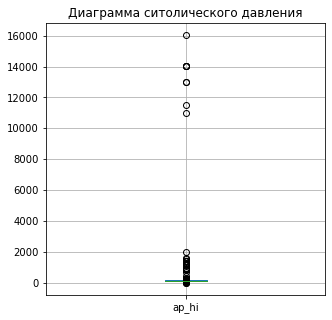

In [295]:
data_train['ap_hi'].plot(kind='box',
                              figsize=(5,5), 
                              grid=True, 
                              legend=True, 
                              title='Диаграмма ситолического давления')

In [296]:
# Все значения свыше 10 000 разделим на 100:
data_train.loc[(data_train['ap_hi']>=10000),'ap_hi']=round(((data_train.loc[(data_train['ap_hi']>=10000),'ap_hi'])/100),0)
# Все значения свыше 1000 разделим на 10
data_train.loc[(data_train['ap_hi']>=1000),'ap_hi']=round(((data_train.loc[(data_train['ap_hi']>=1000),'ap_hi'])/10),0)

<AxesSubplot:title={'center':'Диаграмма ситолического давления'}>

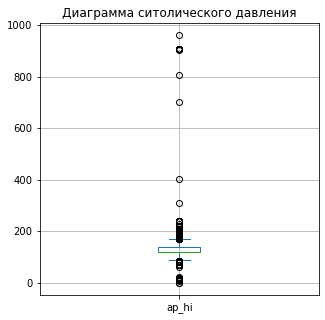

In [297]:
data_train['ap_hi'].plot(kind='box',
                              figsize=(5,5), 
                              grid=True, 
                              legend=True, 
                              title='Диаграмма ситолического давления')

In [298]:
data_train.loc[(data_train['ap_hi']>=900)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1871,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2009,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
4809,6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
17694,25314,22398,2,163,50.0,907,70,3,3,0,0,1,1
23840,34120,16131,1,161,92.0,906,0,2,1,0,0,1,1
29632,42410,17548,1,154,65.0,907,70,1,1,0,0,1,0
31749,45400,16070,1,170,64.0,907,0,1,1,0,0,1,0
42354,60565,17988,2,176,69.0,906,0,1,1,0,0,1,0
42613,60948,20456,2,182,80.0,906,60,1,1,0,0,1,1
53921,77010,18511,1,164,54.0,960,60,1,1,0,0,1,0


In [299]:
# Судя по всему произошла ошибка в воде данных систолического давления и первая цифра дисастолического давления сместилась в систолическое
# Попробуем это исправить
median_ap_lo_900 = data_train.loc[(data_train['ap_hi']>=900),'ap_lo'].median()
median_ap_lo_900

60.0

In [300]:
data_train.loc[(data_train['ap_hi']>=900)&(data_train['ap_lo']==0),'ap_lo'] = median_ap_lo_900
data_train.loc[(data_train['ap_hi']>=900)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1871,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2009,2845,22712,2,167,59.0,906,60,1,1,0,0,1,0
4809,6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
17694,25314,22398,2,163,50.0,907,70,3,3,0,0,1,1
23840,34120,16131,1,161,92.0,906,60,2,1,0,0,1,1
29632,42410,17548,1,154,65.0,907,70,1,1,0,0,1,0
31749,45400,16070,1,170,64.0,907,60,1,1,0,0,1,0
42354,60565,17988,2,176,69.0,906,60,1,1,0,0,1,0
42613,60948,20456,2,182,80.0,906,60,1,1,0,0,1,1
53921,77010,18511,1,164,54.0,960,60,1,1,0,0,1,0


In [301]:
data_train.loc[(data_train['ap_hi']>=900),'ap_hi'] = 90
data_train.loc[(data_train['ap_hi']>=300)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
9545,13616,22659,1,155,87.0,701,110,1,1,0,0,1,1
40289,57646,20322,1,162,50.0,309,0,1,1,0,0,1,0
40789,58349,19806,1,162,67.0,401,80,1,3,0,0,1,1
41463,59301,20970,1,154,41.0,806,0,1,1,0,0,1,0


In [302]:
# Значения больше 300 разделим на 10 и округлим до целых
#data_train.loc[(data_train['ap_hi']>=300),'ap_hi']=round(((data_train.loc[(data_train['ap_hi']>=300),'ap_hi'])/10),0)
#Удалим их мало:
data_train = data_train.drop((data_train.loc[(data_train['ap_hi']>=300)]).index).reset_index(drop=True)

<AxesSubplot:title={'center':'Диаграмма ситолического давления'}>

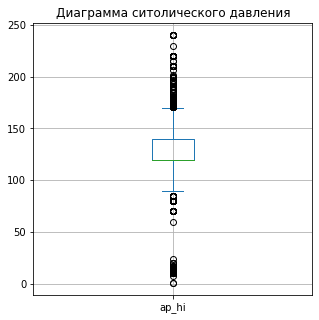

In [303]:
data_train['ap_hi'].plot(kind='box',
                              figsize=(5,5), 
                              grid=True, 
                              legend=True, 
                              title='Диаграмма ситолического давления')

In [304]:
data_train.loc[(data_train['ap_hi']<=50),'ap_hi'].unique()

array([14, 11, 12, 10, 16,  7, 15, 17,  1, 13, 20, 24], dtype=int64)

In [305]:
data_train.loc[(data_train['ap_hi']<=50)&(data_train['ap_hi']>=20)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
17852,25543,20367,2,181,79.0,20,80,1,1,0,0,1,1
24821,35489,21082,2,170,100.0,20,80,1,1,0,0,0,1
31281,44701,22801,1,163,115.0,20,170,1,1,0,0,1,1
37290,53316,18909,2,175,104.0,20,90,1,2,0,0,1,1
52786,75399,17770,2,164,64.0,24,20,3,1,0,0,1,1


In [306]:
#Удалим их мало:
data_train = data_train.drop((data_train.loc[(data_train['ap_hi']<=50)&(data_train['ap_hi']>=20)]).index).reset_index(drop=True)

In [307]:
data_train.loc[(data_train['ap_hi']<20)&(data_train['ap_hi']>=10)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
567,815,21281,1,168,78.0,14,90,2,1,0,0,1,1
927,1294,21867,2,175,70.0,14,90,3,1,0,0,1,1
979,1360,18225,1,172,65.0,11,80,1,3,0,0,1,0
1597,2260,19201,1,165,66.0,12,80,1,1,0,0,1,0
1622,2301,22591,1,165,71.0,14,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68539,98039,21217,1,160,59.0,12,80,1,1,0,0,1,0
68651,98213,18755,1,158,74.0,14,90,1,1,0,0,1,1
68907,98568,19107,1,154,77.0,14,90,1,1,0,0,1,0
69046,98743,15442,2,176,65.0,12,80,1,1,0,0,1,0


In [308]:
data_train.loc[(data_train['ap_hi']<20)&(data_train['ap_hi']>=10),'ap_hi']=(data_train.loc[(data_train['ap_hi']<20)&(data_train['ap_hi']>=10),'ap_hi'])*10

In [309]:
data_train.loc[(data_train['ap_hi']<20)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
5374,7657,21240,1,162,69.0,7,80,1,1,0,0,1,0
8745,12494,16905,2,163,63.0,1,2088,1,1,1,0,1,0
42283,60477,18716,1,171,80.0,1,1088,1,1,0,0,1,1


In [310]:
#Удалим их мало:
data_train = data_train.drop((data_train.loc[(data_train['ap_hi']<20)]).index).reset_index(drop=True)
data_train['ap_hi'].unique()

array([110, 140, 130, 150, 100, 120, 145, 170, 135, 125,  90, 180, 160,
       133, 190,  80, 122, 169, 126, 158, 200, 123,  70, 161, 147, 115,
       137, 153, 148, 105, 220, 119, 141, 165, 164, 124, 172, 162, 117,
       134, 166, 210, 176, 116, 121, 112, 159, 113, 118, 155, 142, 131,
       157, 136, 146, 138, 109,  85, 106, 129,  93,  95, 179, 156, 168,
       132, 104, 103, 178, 175, 128, 151, 139, 127, 108, 144, 102, 143,
       107, 184, 149, 167, 114, 101,  60, 181, 171, 202, 111, 188, 185,
       163, 173, 154, 177, 174, 240, 191, 197, 152,  96, 199, 193,  99,
       196, 230, 207, 215,  97, 195, 187], dtype=int64)

In [311]:
data_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69906.000000,69906.000000,69906.000000,69906.000000,69906.000000,69906.000000,69906.000000,69906.000000,69906.000000,69906.000000,69906.000000,69906.000000,69906.000000
mean,49971.719309,19468.490916,1.349741,164.359340,74.214850,127.002289,96.617215,1.367336,1.226719,0.088233,0.053844,0.803593,0.499814
std,28851.539839,2467.843930,0.476892,8.213771,14.398996,17.106211,188.406839,0.680548,0.572549,0.283635,0.225711,0.397282,0.500004
min,0.000000,10798.000000,1.000000,55.000000,10.000000,60.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25003.750000,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49994.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.750000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Диаграмма диастолического давления'}>

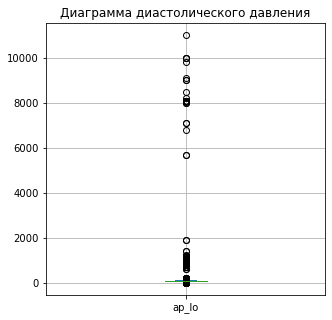

In [312]:
#Диастолическое давление:
data_train['ap_lo'].plot(kind='box',
                              figsize=(5,5), 
                              grid=True, 
                              legend=True, 
                              title='Диаграмма диастолического давления')

In [313]:
# Все значения свыше 3000 разделим на 10
data_train.loc[(data_train['ap_lo']>=3000),'ap_lo']=round(((data_train.loc[(data_train['ap_lo']>=3000),'ap_lo'])/100),0)
# Все значения свыше 1000 разделим на 10
data_train.loc[(data_train['ap_lo']>=400),'ap_lo']=round(((data_train.loc[(data_train['ap_lo']>=400),'ap_lo'])/10),0)

<AxesSubplot:title={'center':'Диаграмма диастолического давления'}>

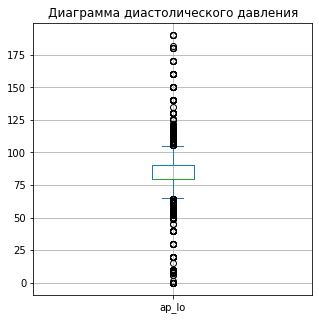

In [314]:
data_train['ap_lo'].plot(kind='box',
                              figsize=(5,5), 
                              grid=True, 
                              legend=True, 
                              title='Диаграмма диастолического давления')

In [315]:
data_train.loc[(data_train['ap_lo']==0)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
13471,19258,14965,2,150,60.0,130,0,1,1,0,0,0,0
16439,23512,20457,1,156,50.0,138,0,3,1,0,0,1,1
17359,24837,18226,1,164,78.0,138,0,1,1,0,0,1,0
22892,32749,21182,2,166,68.0,149,0,1,1,0,0,1,1
25419,36325,17952,2,176,73.0,120,0,1,1,0,0,1,0
27650,39577,23396,2,180,73.0,140,0,1,1,1,1,1,1
38325,54780,23208,2,170,81.0,148,0,1,1,0,0,1,0
43865,62754,18802,1,164,78.0,108,0,2,1,0,0,1,0
45772,65470,19597,2,165,70.0,140,0,3,1,1,0,1,0
47981,68612,19012,1,160,84.0,121,0,1,1,0,0,0,1


In [316]:
#Заменим нулевые значения так, чтобы разность верхнего и нижнего давления не превышала 40 мм.рт.ст
data_train.loc[(data_train['ap_lo']==0),'ap_lo']= data_train.loc[(data_train['ap_lo']==0,'ap_hi')]-40

In [317]:
data_train.loc[(data_train['ap_lo']<=40)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
418,594,16658,1,157,72.0,150,30,1,1,0,0,1,1
507,728,16822,1,165,64.0,140,40,1,1,0,0,1,1
5325,7590,20984,1,164,102.0,120,30,2,1,0,0,1,0
6727,9610,16705,1,156,61.0,150,10,1,1,0,0,0,1
7587,10843,14661,2,70,72.0,120,8,1,1,0,0,1,0
8783,12550,21155,1,162,68.0,110,20,1,1,0,0,1,0
9762,13943,21802,1,166,125.0,120,8,3,1,0,0,1,1
10091,14410,18334,1,152,50.0,150,10,3,1,0,0,1,1
10628,15213,20343,1,160,65.0,130,40,3,1,0,0,0,1
11802,16884,18171,1,169,69.0,128,20,1,1,0,0,1,1


In [318]:
data_train.loc[(data_train['ap_lo']<=40)&(data_train['ap_hi']==120),'ap_lo']=80 

In [319]:
data_train.loc[(data_train['ap_lo']<=40)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
418,594,16658,1,157,72.0,150,30,1,1,0,0,1,1
507,728,16822,1,165,64.0,140,40,1,1,0,0,1,1
6727,9610,16705,1,156,61.0,150,10,1,1,0,0,0,1
8783,12550,21155,1,162,68.0,110,20,1,1,0,0,1,0
10091,14410,18334,1,152,50.0,150,10,3,1,0,0,1,1
10628,15213,20343,1,160,65.0,130,40,3,1,0,0,0,1
11802,16884,18171,1,169,69.0,128,20,1,1,0,0,1,1
11933,17067,15795,2,160,52.0,70,40,1,1,1,0,1,0
12979,18534,22627,1,158,67.0,140,40,1,1,0,0,1,1
13737,19634,15892,1,157,73.0,60,40,1,3,0,0,0,0


In [320]:
data_train.loc[(data_train['ap_lo']<=10),'ap_lo']=((data_train.loc[(data_train['ap_lo']<=10),'ap_lo'])*10)
data_train.loc[(data_train['ap_lo']<=40)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
418,594,16658,1,157,72.0,150,30,1,1,0,0,1,1
507,728,16822,1,165,64.0,140,40,1,1,0,0,1,1
8783,12550,21155,1,162,68.0,110,20,1,1,0,0,1,0
10628,15213,20343,1,160,65.0,130,40,3,1,0,0,0,1
11802,16884,18171,1,169,69.0,128,20,1,1,0,0,1,1
11933,17067,15795,2,160,52.0,70,40,1,1,1,0,1,0
12979,18534,22627,1,158,67.0,140,40,1,1,0,0,1,1
13737,19634,15892,1,157,73.0,60,40,1,3,0,0,0,0
13917,19885,18007,1,164,74.0,110,20,1,1,0,0,1,0
17530,25074,15302,1,159,56.0,130,40,1,1,0,0,1,1


In [321]:
data_train.loc[(data_train['ap_lo']<=15),'ap_lo']=((data_train.loc[(data_train['ap_lo']<=15),'ap_lo'])*10)
data_train.loc[(data_train['ap_lo']<=40)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
418,594,16658,1,157,72.0,150,30,1,1,0,0,1,1
507,728,16822,1,165,64.0,140,40,1,1,0,0,1,1
8783,12550,21155,1,162,68.0,110,20,1,1,0,0,1,0
10628,15213,20343,1,160,65.0,130,40,3,1,0,0,0,1
11802,16884,18171,1,169,69.0,128,20,1,1,0,0,1,1
11933,17067,15795,2,160,52.0,70,40,1,1,1,0,1,0
12979,18534,22627,1,158,67.0,140,40,1,1,0,0,1,1
13737,19634,15892,1,157,73.0,60,40,1,3,0,0,0,0
13917,19885,18007,1,164,74.0,110,20,1,1,0,0,1,0
17530,25074,15302,1,159,56.0,130,40,1,1,0,0,1,1


In [322]:
data_train.loc[(data_train['ap_lo']<=40)&(data_train['ap_hi']>=100),'ap_lo']= data_train.loc[(data_train['ap_lo']<=40)&(data_train['ap_hi']>=100),'ap_hi']-40

In [323]:
data_train.loc[(data_train['ap_lo']<=40)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
11933,17067,15795,2,160,52.0,70,40,1,1,1,0,1,0
13737,19634,15892,1,157,73.0,60,40,1,3,0,0,0,0
33005,47217,20919,1,149,54.0,90,40,1,1,0,0,1,0
43072,61612,19122,1,162,63.0,80,40,2,2,0,0,0,0
45888,65633,15399,1,158,47.0,70,40,1,1,0,0,1,0


In [324]:
#Рассмотрим строки, в которых систалическое давление ниже диастолического:
data_train[data_train['ap_lo']>data_train['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
474,681,19099,1,156,65.0,120,150,2,1,0,0,1,0
636,913,20457,2,169,68.0,70,110,1,1,0,0,1,0
2378,3356,23361,1,154,102.0,90,150,1,1,0,0,0,1
2983,4214,21957,2,182,90.0,80,140,3,3,0,0,1,1
3440,4880,19992,2,180,80.0,80,125,3,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66223,94673,22551,1,169,88.0,100,160,3,3,0,0,0,1
66565,95164,19498,2,160,81.0,80,120,3,3,1,1,1,1
67328,96271,23424,1,153,74.0,80,130,1,1,0,0,1,1
67377,96339,21193,2,172,57.0,80,120,1,1,1,0,1,1


In [325]:
data_train[(data_train['ap_lo']>data_train['ap_hi'])&(data_train['ap_hi']==120)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
474,681,19099,1,156,65.0,120,150,2,1,0,0,1,0
34486,49321,21922,1,164,82.0,120,140,1,1,0,0,0,0


In [326]:
data_train.loc[(data_train['ap_lo']>=140)&(data_train['ap_hi']==120),'ap_lo']=80 

In [327]:
data_train[data_train['ap_lo']>=data_train['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
636,913,20457,2,169,68.0,70,110,1,1,0,0,1,0
2378,3356,23361,1,154,102.0,90,150,1,1,0,0,0,1
2983,4214,21957,2,182,90.0,80,140,3,3,0,0,1,1
3440,4880,19992,2,180,80.0,80,125,3,3,1,1,1,1
3616,5130,21874,1,160,83.0,80,120,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66223,94673,22551,1,169,88.0,100,160,3,3,0,0,0,1
66565,95164,19498,2,160,81.0,80,120,3,3,1,1,1,1
67328,96271,23424,1,153,74.0,80,130,1,1,0,0,1,1
67377,96339,21193,2,172,57.0,80,120,1,1,1,0,1,1


In [328]:
data_train['hi_lo']= data_train['ap_hi']-data_train['ap_lo']
#data_train['ap_hi_copy']=data_train['ap_hi']
#data_train['ap_lo_copy']=data_train['ap_lo']
#data_train.loc[(data_train['hi_lo']<0),'ap_hi']=data_train.loc[(data_train['hi_lo']<0),'ap_lo_copy']
#data_train.loc[(data_train['hi_lo']<0),'ap_lo']=data_train.loc[(data_train['hi_lo']<0),'ap_hi_copy'

In [329]:
data_test['hi_lo']= data_test['ap_hi']-data_test['ap_lo']

In [330]:
#data_train[data_train['ap_lo']>data_train['ap_hi']]

In [331]:
data_train = data_train.drop((data_train.loc[(data_train['hi_lo']<=0)]).index).reset_index(drop=True)

In [332]:
data_train.shape

(69796, 14)

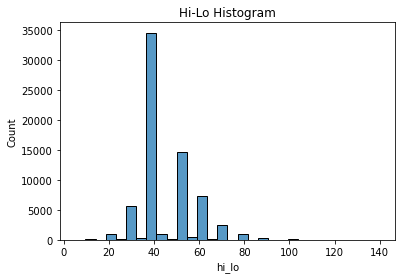

In [333]:
#Возраст
sns.histplot(data_train["hi_lo"], bins=30)
plt.title("Hi-Lo Histogram")
plt.show()

In [334]:
data_train.loc[(data_train['hi_lo']<20)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,hi_lo
209,288,18169,2,172,62.0,80,70,1,1,0,0,1,0,10
2388,3373,19752,1,162,58.0,110,100,2,1,0,0,1,0,10
3223,4557,22635,2,170,92.0,105,90,3,1,0,1,0,1,15
3469,4926,18041,2,175,85.0,100,90,1,1,0,1,1,0,10
3490,4957,14800,1,167,67.0,100,90,1,1,0,0,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66212,94810,17990,1,145,69.0,100,90,2,1,0,0,0,0,10
67269,96340,17610,1,151,70.0,100,90,2,1,0,0,1,0,10
67623,96865,16791,1,157,74.0,100,90,2,1,0,0,1,1,10
67819,97151,21701,1,154,64.0,85,66,1,1,0,1,1,0,19


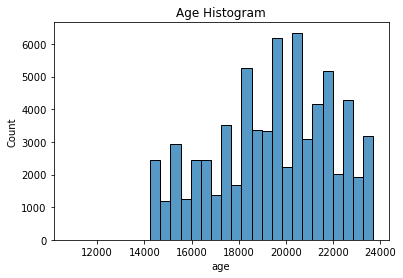

In [335]:
#Возраст
sns.histplot(data_train["age"], bins=30)
plt.title("Age Histogram")
plt.show()

In [336]:
data_train['age_year']=round((data_train['age']/365),0)
data_test['age_year']=round((data_test['age']/365),0)

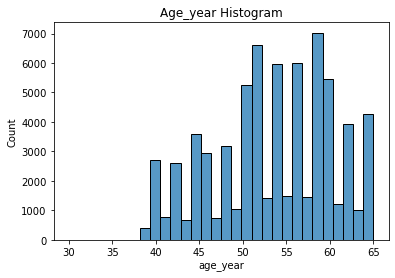

In [337]:
sns.histplot(data_train["age_year"], bins=30)
plt.title("Age_year Histogram")
plt.show()

In [338]:
#индекс массы тела
data_train['BMI']=(data_train['weight']/((data_train['height']/100)**2)).astype(int)
data_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,hi_lo,age_year,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,30,50.0,21
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,50,55.0,34
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,60,52.0,23
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,50,48.0,28
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,40,48.0,23


In [339]:
data_test['BMI']=(data_test['weight']/((data_test['height']/100)**2)).astype(int)

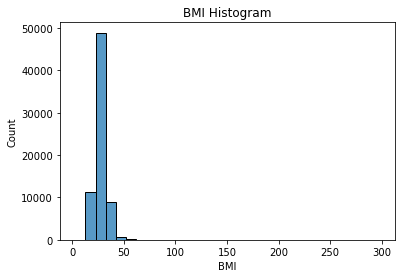

In [340]:
sns.histplot(data_train["BMI"], bins=30)
plt.title("BMI Histogram")
plt.show()

In [341]:
data_train['BMI'].unique()

array([ 21,  34,  23,  28,  29,  37,  25,  20,  22,  31,  27,  36,  18,
        24,  30,  43,  26,  40,  33,  32,  19,  47,  38,  17,  35,  95,
        41,  42,  39,  57,  62,  51,  50,  46,  16,  44,  53,  48,  58,
        45,  52,  56,  65,  15,  49,  64,  70,  54,  55,  14,  59, 108,
        13, 146, 180,  74,  85, 298, 134, 126,  60, 138, 106,  12, 178,
        10,  86,  11,  67,  61, 133, 140, 267, 237,   9, 278, 148,  66,
       191,   7, 142, 170,   3,  69,  68, 147, 153,  63, 152,   8, 165,
       144,  72, 187])

In [342]:
data_train[(data_train['BMI']>70)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,hi_lo,age_year,BMI
224,309,21800,2,76,55.0,120,80,1,1,0,0,1,0,40,60.0,95
6133,8757,20990,1,122,161.0,120,80,1,1,0,0,1,1,40,58.0,108
7576,10843,14661,2,70,72.0,120,80,1,1,0,0,1,0,40,40.0,146
8148,11662,17646,2,97,170.0,160,100,1,1,1,0,1,1,60,48.0,180
11192,16062,18307,1,110,90.0,120,80,1,1,0,0,1,0,40,50.0,74
12397,17757,22077,1,137,161.0,150,100,2,1,0,0,0,1,50,60.0,85
12732,18218,19594,1,75,168.0,120,80,1,1,1,0,1,1,40,54.0,298
13226,18928,22456,2,71,68.0,120,80,3,1,0,0,1,0,40,62.0,134
14281,20459,22005,1,67,57.0,120,90,1,1,0,0,1,1,30,60.0,126
15123,21686,15812,1,70,68.0,120,80,1,1,0,0,0,0,40,43.0,138


In [343]:
data_train.loc[((data_train['BMI']>70)&(data_train['height']<100)),'height']= data_train.loc[((data_train['BMI']>70)&(data_train['height']<100)),'height']+100
data_train['BMI']=(data_train['weight']/((data_train['height']/100)**2)).astype(int)

In [344]:
data_train[(data_train['BMI']>70)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,hi_lo,age_year,BMI
6133,8757,20990,1,122,161.0,120,80,1,1,0,0,1,1,40,58.0,108
11192,16062,18307,1,110,90.0,120,80,1,1,0,0,1,0,40,50.0,74
12397,17757,22077,1,137,161.0,150,100,2,1,0,0,0,1,50,60.0,85
15322,21958,17405,1,125,167.0,180,90,1,2,0,0,1,1,90,48.0,106
17028,24396,21259,1,100,86.0,110,70,1,1,0,0,1,1,40,58.0,86
19973,28605,19777,1,112,167.0,180,120,1,1,0,1,1,0,60,54.0,133
28816,41289,18961,1,110,105.0,140,90,2,1,0,0,1,1,50,52.0,86
45227,64802,19834,1,104,159.0,200,100,3,1,0,0,0,1,100,54.0,147
59447,85128,17643,1,104,165.0,120,80,1,1,0,0,1,0,40,48.0,152
64595,92478,23476,1,105,80.0,130,90,1,1,0,0,1,1,40,64.0,72


In [345]:
data_train[(data_train['BMI']<12)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,hi_lo,age_year,BMI
16860,24167,17272,2,170,31.0,150,90,2,2,0,0,1,1,60,47.0,10
18507,26503,18140,1,160,30.0,120,80,1,1,0,0,1,1,40,50.0,11
26726,38312,23284,1,157,23.0,110,80,1,1,0,0,1,0,30,64.0,9
29404,42156,20408,2,177,22.0,120,80,1,1,1,1,1,0,40,56.0,7
33724,48318,21582,2,178,11.0,130,90,1,1,0,0,1,1,40,59.0,3
57685,82567,18804,2,165,10.0,180,110,2,2,0,0,1,1,70,52.0,3
60009,85931,21855,1,162,21.0,120,80,2,1,0,0,1,1,40,60.0,8
60517,86650,18875,1,171,29.0,110,70,2,1,0,0,1,1,40,52.0,9


In [346]:
data_train = data_train.drop((data_train.loc[(data_train['BMI']<12)]).index).reset_index(drop=True)

In [347]:
data_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,hi_lo,age_year,BMI
count,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000,69788.000000
mean,49972.128718,19468.579885,1.349602,164.393950,74.217391,127.063277,81.590818,1.367269,1.226429,0.088181,0.053548,0.803605,0.499613,45.472459,53.338052,27.018943
std,28853.266434,2468.007206,0.476848,8.014479,14.389478,17.035891,9.715815,0.680464,0.572160,0.283560,0.225125,0.397273,0.500003,11.752377,6.767396,5.394483
min,0.000000,10798.000000,1.000000,91.000000,28.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,30.000000,12.000000
25%,25002.750000,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,48.000000,23.000000
50%,49988.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,54.000000,26.000000
75%,74891.250000,21328.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000,58.000000,30.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,140.000000,65.000000,152.000000


In [348]:
data_train.shape

(69788, 16)

In [349]:
#Делаем копию
data_train_new = data_train.copy()
data_test_new = data_test.copy()#обучающий датасет


interval columns not set, guessing: ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'BMI', 'hi_lo', 'cardio']


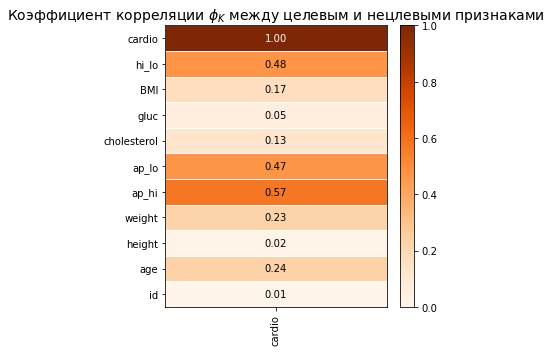

In [350]:
#Исключим бинарные признаки кроме целевого
data_train_phik = data_train[['id','age','height','weight','ap_hi','ap_lo','cholesterol','gluc','BMI','hi_lo','cardio']]
# выведем матрицу корреляции только для целевого признака:
phik_overview = data_train_phik.phik_matrix()[['cardio']]
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, 
                        vmax=1,
                        color_map="Oranges", 
                        title=r"Коэффициент корреляции $\phi_K$ между целевым и нецлевыми признаками", 
                        fontsize_factor=1, 
                        figsize=(5, 5))
plt.tight_layout()

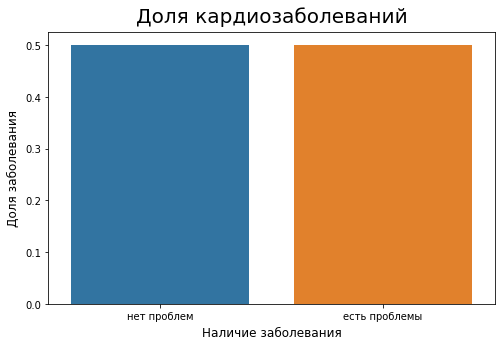

In [351]:
# Посмотрим долю наличия/отсутствия кардиозаболеваний:
plt.figure(figsize=(8,5)) 
plt.title("Доля кардиозаболеваний", fontsize = 20, pad = 10)
sns.barplot(x=data_train['cardio'].unique(), y=data_train['cardio'].value_counts(normalize=True))
plt.xlabel("Наличие заболевания", fontsize = 12, labelpad = 5)
plt.ylabel("Доля заболевания", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['нет проблем', 'есть проблемы'])
plt.show()

In [352]:
#В данных практически нет дисбаланса
#Удалим из наших исходных датасетов лишние для данного этапа проектного исследования признаки:
data_train.drop(columns= ['id','ap_hi','weight','age_year'], inplace=True)
data_test.drop(columns= ['id','ap_hi','weight','age_year'], inplace=True)


In [353]:
#Делаем копию
data_train_trans = data_train.copy()
data_test_trans = data_test.copy()

In [354]:
# выделим целевой признак и признаки
target_train = data_train_trans['cardio']
features_train = data_train_trans.drop('cardio', axis=1)
features_test = data_test_trans


In [355]:
#Стандартизуем численные признаки
numeric = ['age','height','ap_lo','cholesterol','gluc','BMI','hi_lo']# список всех численных признаков

In [356]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
# посмотрим, что получилось
features_train.head()
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69788 entries, 0 to 69787
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69788 non-null  float64
 1   gender       69788 non-null  int64  
 2   height       69788 non-null  float64
 3   ap_lo        69788 non-null  float64
 4   cholesterol  69788 non-null  float64
 5   gluc         69788 non-null  float64
 6   smoke        69788 non-null  int64  
 7   alco         69788 non-null  int64  
 8   active       69788 non-null  int64  
 9   hi_lo        69788 non-null  float64
 10  BMI          69788 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 5.9 MB


In [357]:
# размер таблицы
print('Размер преобразованных признаков обучающих данных',features_train.shape)
print('Размер преобразованной признаков тестовых данных',features_test.shape)

Размер преобразованных признаков обучающих данных (69788, 11)
Размер преобразованной признаков тестовых данных (30000, 11)


0    0.500387
1    0.499613
Name: cardio, dtype: float64


<AxesSubplot:>

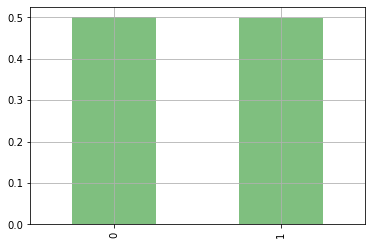

In [358]:
# проверим сбалансированность данных. Для этого посчитаем, как часто в целевом признаке встречается класс «1» или «0».
# обучающий набор данных:
class_frequency = target_train.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar',                       
                     alpha = 0.5,
                     grid=True, 
                     color ='green')


Далее обучим три модели:логистическая регрессия, решающее дерево, случайный лес,- и оценим их качество кросс-валидацией.


In [359]:
itog_val = {} #список для записи результатов кросс валидации разных моделей
KFOLD = 8 #количество подвыборок для валидации
RS=12345

In [360]:
#best_depth = 0
#best_final_score_dt = 0
#best_min_samples_split = 0 

#for depth in range(8,11):
#    for mss in range(345,350,1):
#        model_dt = DecisionTreeClassifier(random_state=RS, max_depth=depth, min_samples_split = mss, class_weight='balanced')
#        scores_dt = cross_val_score(model_dt,features_train, target_train, cv=KFOLD , scoring='roc_auc',n_jobs=-1)
#        final_score = sum(scores_dt)/len(scores_dt)
        
#        if final_score > best_final_score_dt:
#            best_depth = depth
#            best_final_score_dt = final_score 
#            best_min_samples_split=mss
#print("Глубина дерева =", best_depth)
#print("Минимальное количество выборок для разбиения узлов =", best_min_samples_split)
#print('Средняя оценка качества модели решающего дерева кросс-валидацией при оптимальных гиперпараметрах модели:',
#      '{:.4f}'.format(best_final_score_dt))
#itog_val['DecisionTreeClassifier'] = best_final_score_dt

In [361]:
#model_lr = LogisticRegression(random_state=RS, solver='liblinear', class_weight='balanced')
#scores_lr = cross_val_score(model_lr,features_train, target_train, cv=KFOLD, scoring='roc_auc',n_jobs=-1)
#final_score_lr = sum(scores_lr)/len(scores_lr)
#print('Средняя оценка качества модели логистической регрессии кросс-валидацией:', final_score_lr)
#itog_val['LogisticRegression'] = final_score_lr

In [362]:
#Случайный лес  Для ускорения работы подобранные ранее параметры поставим на свои места
#best_depth = 0
#best_estimators = 0
best_final_score_rfc = 0

#for est in range(200,350,1):
    #for depth in range(10, 15, 1):
model_rfc = RandomForestClassifier(random_state=12345, max_depth=11, n_estimators=349, class_weight='balanced') 
scores_rfc = cross_val_score(model_rfc,features_train, target_train, cv=8, scoring='roc_auc')
final_score = sum(scores_rfc)/len(scores_rfc)
    #if final_score > best_final_score_rfc:
        #best_depth = depth
         #   best_estimators = est
best_final_score_rfc = final_score                        
# print("Оптимальная глубина дерева =", best_depth)
#print("Оптимальная количество деревьев =", best_estimators)
print('Средняя оценка качества модели случайного кросс-валидацией при оптимальных гиперпараметрах модели:',
      best_final_score_rfc)
#itog_val['RandomForestClassifier'] = best_final_score_rfc

Средняя оценка качества модели случайного кросс-валидацией при оптимальных гиперпараметрах модели: 0.802638291894645


In [363]:
#print("Оптимальная глубина дерева =", best_depth)
#print("Оптимальная количество деревьев =", best_estimators)
#print('Средняя оценка качества модели случайного кросс-валидацией при оптимальных гиперпараметрах модели:',
     # best_final_score_rfc)

In [364]:
#посмотрим на графике средний показатель тестов перекрестной проверки каждой модели:
#DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False, color='lightblue')

In [365]:
#исходя из лучшей метрики, будем дальше работать с моделью Случайного леса
model_finish =  RandomForestClassifier(random_state=12345, max_depth=11, n_estimators=349, class_weight='balanced')
model_finish.fit(features_train, target_train)
# предсказываем Целевой признак
predicted_target_test = model_finish.predict(features_test)
#получаем предсказания в вероятностях
probabilities_test = model_finish.predict_proba(features_test)
# сохраняем вероятности только для положительного исхода
probabilities_one_test = probabilities_test[:, 1]



Сохраним модель

In [366]:
import pickle
from pickle import dump,load
with open("C:/Users/zst/Documents/Kaggle competetion/yap15-heart-diseases-predictions/models/model_finish","wb") as fid: 
    dump(model_finish,fid)
with open("C:/Users/zst/Documents/Kaggle competetion/yap15-heart-diseases-predictions/models/scaler","wb") as fid_1: 
    dump(scaler,fid_1)

In [367]:
#сохраним предсказания нашей модели в таблице data_test:
data_test_new['cardio'] = probabilities_one_test.round(1)
data_test_new.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,hi_lo,age_year,BMI,cardio
0,5,18888,1,154,85.0,130,80,1,1,0,0,1,50,52.0,35,0.5
1,6,19042,2,170,69.0,130,90,1,1,0,0,1,40,52.0,23,0.6
2,7,20432,1,160,70.0,120,75,1,1,0,0,0,45,56.0,27,0.4
3,10,18133,2,185,94.0,130,90,1,1,0,0,1,40,50.0,27,0.5
4,11,16093,2,170,76.0,120,80,1,1,0,0,1,40,44.0,26,0.2
5,17,16712,1,160,68.0,120,80,1,1,0,0,0,40,46.0,26,0.3
6,19,15873,2,170,68.0,120,80,1,1,0,0,0,40,43.0,23,0.2
7,20,20424,1,164,60.0,120,80,1,1,0,0,0,40,56.0,22,0.4
8,22,20262,1,170,68.0,110,70,1,1,0,0,1,40,56.0,23,0.3
9,26,21737,1,162,88.0,180,100,2,2,0,1,1,80,60.0,33,0.9


In [377]:
#важные признаки, которые выделила модель
importances = model_finish.feature_importances_

In [378]:
len(importances)

11

In [379]:
feature_list = list(features_test.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

print(feature_results)

        feature  importance
0         ap_lo    0.328735
1         hi_lo    0.281867
2           age    0.157951
3   cholesterol    0.091793
4           BMI    0.062433
5        height    0.036455
6          gluc    0.014751
7        active    0.009571
8        gender    0.005998
9         smoke    0.005663
10         alco    0.004784


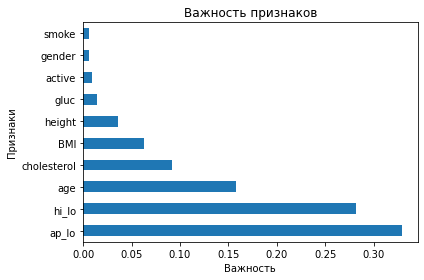

In [380]:
#Посмотрим, какие признаки выделила наша модель чуть по-другому
pd.Series(importances, features_test.columns).nlargest(10).plot(kind='barh')
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

In [372]:
#Сохраним файл для кагла
sample_submission = data_test_new[['id','cardio']].copy()

In [373]:
sample_submission.head()

,id,cardio
0,5,0.5
1,6,0.6
2,7,0.4
3,10,0.5
4,11,0.2


In [374]:
sample_submission.shape

(30000, 2)

In [375]:
sample_submission.to_csv (r'C:\Users\zst\Documents\Kaggle competetion\yap15-heart-diseases-predictions\models\sample_submission.csv', index= False )